In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import torch
import torch.utils.data as dutils

In [4]:
device = 'cpu'
seed = 99

In [22]:
input_dim = 2
output_dim = 1
num_examples = 10000

batch_size = 2

torch.manual_seed(seed);

In [6]:
def plot(losses, X, net, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    
    fg2.set_title('Estimated vs real function')
    with torch.no_grad():
        fg2.plot(X[:sample_size, 0].cpu().numpy(),
                 net(X[:sample_size, :]).cpu().numpy(), 'or', label='Estimated')
        fg2.plot(X[:sample_size, 0].cpu().numpy(),
                 real_fn(X[:sample_size, :]).cpu().numpy(), '*g', label='Real')
    fg2.legend()

    plt.show()

### Data Setup

In [7]:
def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

In [8]:
X = torch.randn(size=(num_examples, input_dim), device=device)
noise = 0.1 * torch.randn(num_examples, device=device)
Y = real_fn(X) + noise

In [9]:
print('Data sample: ', X[0], Y[0])
print('Data target before noise: ', 2 * X[0, 0] - 3.4 * X[0, 1] + 4.2)

Data sample:  tensor([ 0.2995, -2.6429]) tensor(13.7714)
Data target before noise:  tensor(13.7846)


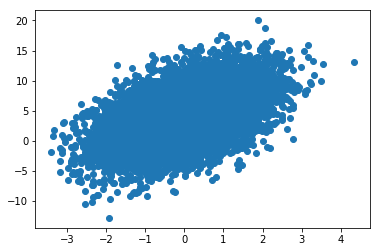

In [10]:
f = X.numpy()[:, 0]
t = Y.numpy()
plt.scatter(f, t);

In [23]:
dataset = dutils.TensorDataset(X, Y)
train_loader = dutils.DataLoader(dataset, shuffle=True, batch_size=batch_size)

In [24]:
for i, (row, target) in enumerate(train_loader):
    print(row, target)
    break

tensor([[-0.5023,  0.3130],
        [-0.8637,  1.5604]]) tensor([ 2.0765, -2.7440])


### Model setup

In [25]:
class Net():
    def __init__(self, input_dim, out_dim, device):
        self.w = torch.randn(size=(input_dim, output_dim), device=device, requires_grad=True)
        self.b = torch.randn(size=(output_dim, 1), device=device, requires_grad=True)
#         print('Weight shape: ', self.w.shape)
#         print('Bias shape: ', self.b.shape)
        
    def forward(self, x):
        w = self.w
        bias = self.b
        out = torch.mm(x, w) + bias
        return out.squeeze()
    
    def parameters(self):
        return [self.w, self.b]
    
    def zero_grad(self):
        self.w.grad = None
        self.b.grad = None
        
    def __call__(self, x):
        return self.forward(x)

In [26]:
def square_loss(yhat, y):
    return ((yhat - y) ** 2).mean()

In [27]:
def SGD(params, lr):
    for param in params:
#         print(param)
        param.data = param.data - lr * param.grad
#         print(param)

In [30]:
net = Net(input_dim, output_dim, device)

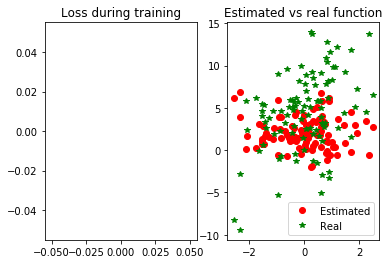

14.402484302082424
2.02622205091138
0.29267642818027306
0.04964822954434139
0.015586895019132225


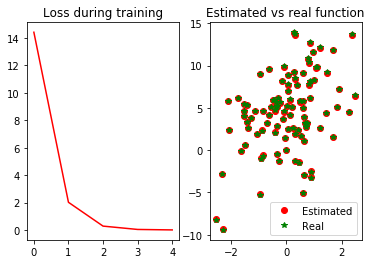

In [31]:
epochs = 5
learning_rate = .0001
num_batches = num_examples / batch_size
params = net.parameters()

losses = []
plot(losses, X, net)
for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, label) in enumerate(train_loader):
        
        output = net(data)
        loss = square_loss(output, label)
        
        loss.backward()
        SGD(params, learning_rate)
        net.zero_grad()
        
        cumulative_loss += loss.item()
    print(cumulative_loss / num_batches)
    losses.append(cumulative_loss/num_batches)
    
plot(losses, X, net)